In [17]:
import pandas as pd

film_scripts = pd.read_csv('cleaned_pudding_data.csv', encoding = 'latin-1')
character_list_df = pd.read_csv('character_list5.csv', encoding = 'latin-1')
character_mapping_df = pd.read_csv('character_mapping.csv', encoding = 'latin-1')
metaddata_df = pd.read_csv('meta_data7.csv', encoding = 'latin-1')

In [18]:
character_list_df.head()

,script_id,imdb_character_name,words,gender,age
0,280,betty,311,f,35.0
1,280,carolyn johnson,873,f,NaN
2,280,eleanor,138,f,NaN
3,280,francesca johns,2251,f,46.0
4,280,madge,190,f,46.0


In [19]:
character_mapping_df.head()

,script_id,imdb_id,character_from_script,closest_character_name_from_imdb_match,closest_imdb_character_id
0,1,tt0147800,bianca,bianca stratford,nm0646351
1,1,tt0147800,cameron,cameron james,nm0330687
2,1,tt0147800,chastity,chastity,nm0005517
3,1,tt0147800,joey,joey donner,nm0005080
4,1,tt0147800,kat,kat stratford,nm0005466


In [20]:
metaddata_df.head()

,script_id,imdb_id,title,year,gross,lines_data
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274533344457777722433777334443764677...
2,1514,tt0417385,12 and Holding,2005,NaN,5461357777754212454544441367774433446547647753...
3,1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777777777777447777756477777444777777...
4,1520,tt1542344,127 Hours,2010,20.0,453513352345765766777777773340


In [21]:
print(character_list_df.columns), print(metaddata_df.columns)

Index(['script_id', 'imdb_character_name', 'words', 'gender', 'age'], dtype='object')
Index(['script_id', 'imdb_id', 'title', 'year', 'gross', 'lines_data'], dtype='object')


(None, None)

In [22]:
print(character_list_df.shape), print(metaddata_df.shape)

(23048, 5)
(2000, 6)


(None, None)

In [23]:
dialogue_df = pd.merge(character_list_df, metaddata_df, on='script_id', how="inner")

In [24]:
dialogue_df.groupby('year')['words'].sum()

year
1929      8572
1931     11601
1932     67534
1933     21125
1934     24646
         ...  
2011    944803
2012    654881
2013    637486
2014    707308
2015    510435
Name: words, Length: 81, dtype: int64

In [25]:
dialogue_df.dtypes

script_id                int64
imdb_character_name     object
words                    int64
gender                  object
age                    float64
imdb_id                 object
title                   object
year                     int64
gross                  float64
lines_data              object
dtype: object

In [26]:
dialogue_df.describe()

,script_id,words,age,year,gross
count,23048.000000,23048.000000,18263.000000,23048.000000,19387.00000
mean,4194.784623,907.871486,42.382960,1998.133070,106.73637
std,2472.985787,1399.593759,59.718859,14.746058,145.85823
min,280.000000,101.000000,3.000000,1929.000000,0.00000
25%,2095.000000,193.000000,30.000000,1992.000000,22.00000
50%,3694.000000,396.000000,39.000000,2001.000000,56.00000
75%,6219.750000,980.000000,50.000000,2009.000000,136.00000
max,9254.000000,28102.000000,2013.000000,2015.000000,1798.00000


In [27]:
dialogue_df.sort_values('year')

,script_id,imdb_character_name,words,gender,age,imdb_id,title,year,gross,lines_data
12342,4031,hammer,5577,m,39.0,tt0019777,The Cocoanuts,1929,NaN,7714326647772653470347777775777763432137777555740
12344,4031,penelope,534,f,24.0,tt0019777,The Cocoanuts,1929,NaN,7714326647772653470347777775777763432137777555740
12345,4031,polly,386,f,28.0,tt0019777,The Cocoanuts,1929,NaN,7714326647772653470347777775777763432137777555740
12341,4031,chico,915,m,42.0,tt0019777,The Cocoanuts,1929,NaN,7714326647772653470347777775777763432137777555740
12340,4031,bob,668,m,42.0,tt0019777,The Cocoanuts,1929,NaN,7714326647772653470347777775777763432137777555740
...,...,...,...,...,...,...,...,...,...,...
16407,5491,fiona perry,120,f,43.0,tt3722070,The Lady in the Van,2015,0.0,5634764174143344321420433343773333423443357575...
16408,5491,housekeeper at,155,f,64.0,tt3722070,The Lady in the Van,2015,0.0,5634764174143344321420433343773333423443357575...
16409,5491,"lois, social wo",114,f,31.0,tt3722070,The Lady in the Van,2015,0.0,5634764174143344321420433343773333423443357575...
20913,8056,lily,278,f,NaN,tt3850214,Dope,2015,18.0,5665777675656547767543446576775676566232366776...


In [28]:
dialogue_df.isna().any()

script_id              False
imdb_character_name     True
words                  False
gender                 False
age                     True
imdb_id                False
title                  False
year                   False
gross                   True
lines_data             False
dtype: bool

<Axes: xlabel='year'>

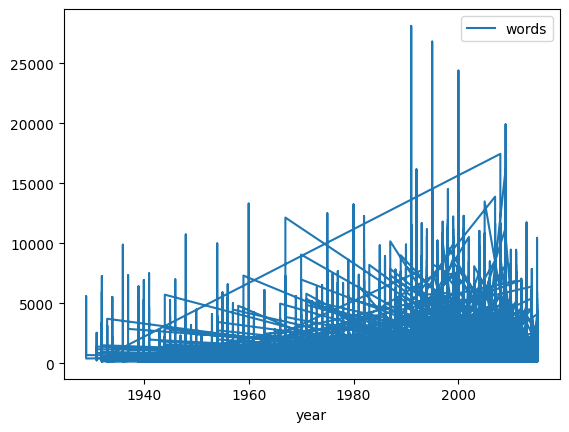

In [29]:
dialogue_df.plot(kind='line', x='year', y='words')

<Axes: xlabel='year'>

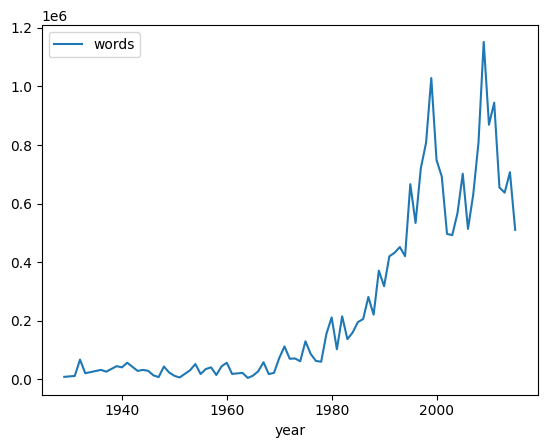

In [30]:
grouped_dialogue_df = dialogue_df.groupby('year')['words'].sum().reset_index()
grouped_dialogue_df.plot(kind='line', x='year', y='words')

In [31]:
dialogue_df['imdb_character_name'].value_counts(ascending=False)

doctor             36
frank              35
charlie            35
sam                29
mike               27
                   ..
ron motley          1
sharon tiller       1
thomas sandefur     1
dr. sercarz         1
wardrobe            1
Name: imdb_character_name, Length: 17613, dtype: int64

In [35]:
import altair as alt
alt.renderers.enable('mimetype')
alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)

ValueError: 
To use the 'notebook' renderer, you must install the vega package
and the associated Jupyter extension.
See https://altair-viz.github.io/getting_started/installation.html
for more information.


In [36]:
alt.Chart(grouped_dialogue_df).mark_line().encode(
    x='year',
    y='words',
)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [37]:
alt.Chart(grouped_dialogue_df).mark_line().encode(
    x='year:T',
    y='words',
)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [38]:
grouped_dialogue_df['date'] = grouped_dialogue_df['year'].astype(str) + '-01-01'
grouped_dialogue_df['date'] = pd.to_datetime(grouped_dialogue_df['date'])

In [39]:
alt.Chart(grouped_dialogue_df).mark_line().encode(
    x='date:T',
    y='words',
)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [40]:
grouped_dialogue_df = dialogue_df.groupby(['year', 'gender'])['words'].sum().reset_index()
grouped_dialogue_df['date'] = grouped_dialogue_df['year'].astype(str) + '-01-01'
grouped_dialogue_df['date'] = pd.to_datetime(grouped_dialogue_df['date'])
alt.Chart(grouped_dialogue_df).mark_line().encode(
    x='date:T',
    y='words',
    color='gender'
)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [43]:
alt.Chart(grouped_dialogue_df).mark_line().encode(
    x='date:T',
    y='words',
    color='gender',
    tooltip=['date', 'words']
).properties(
    title='Dialogue Over Time Colored By Gender'
)

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting
